In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["axes.prop_cycle"] = matplotlib.cycler("color", ["royalblue", "mediumseagreen", "gold", "orange", "tomato", "hotpink", "mediumorchid"])

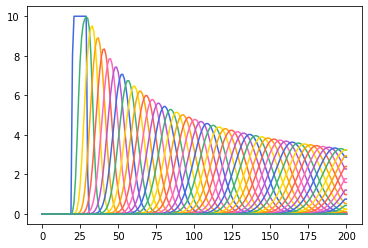

In [3]:
it = 2000
dt = 0.1
dx = 0.5
u = 1.0
C = u*dt/dx
N = 200
T = np.zeros(N+1)
T[20:30] = 10

plt.clf()

for i in range(it):
    T[1:N] = T[1:N] - C * (T[1:N] - T[0:N-1])
    T[N] = T[N-1]

    if i % 20 == 0:
        plt.plot(T)

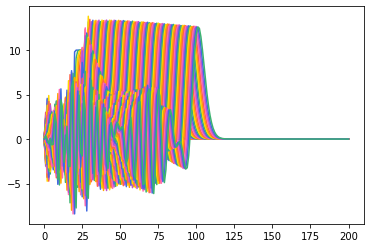

In [4]:
it = 2000
dt = 0.01
dx = 0.5
u = 1.0
C = u*dt/dx
N = 200

T = np.zeros(N+1)
T[20:30] = 10
Told = T.copy()

plt.clf()

for i in range(it):
    T[1:N] = Told[1:N] - C * (T[2:N+1] - T[0:N-1])
    T[N] = T[N-1]
    Told = T.copy()

    if i % 20 == 0:
        plt.plot(T)

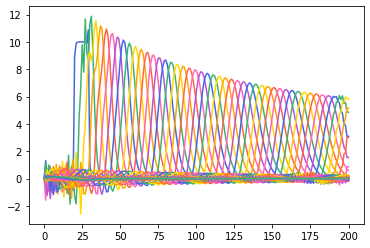

In [5]:
it = 2000
dt = 0.1
dx = 0.5
u = 1.0
C = u*dt/dx
N = 200

T = np.zeros(N+1)
T[20:30] = 10

A = np.zeros((N+1,N+1))
for i in range(1, N):
    A[i,i] = 1
    A[i,i-1] = -0.5*C
    A[i,i+1] = 0.5*C
A[0,0] = 1
A[N,N] = 1

B = np.zeros((N+1,N+1))
for i in range(1, N):
    B[i,i] = 1
B[0,0] = 1
B[N,N] = 1

Ai = np.linalg.inv(A)
C = np.dot(Ai, B)

for i in range(it):
    T = np.dot(C, T)
    T[N] = T[N-1]

    if i % 20 == 0:
        plt.plot(T)

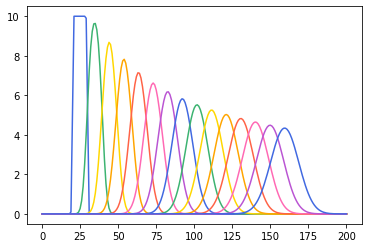

In [6]:
it = 300
dt = 0.01
dx = 0.5; 
C = 0.96
alpha = 0.5
u = C*dx/dt
s = alpha*dt/dx**2

T = np.zeros(N+1)
T[20:30] = 10
Tnew = T.copy()

for i in range(it):
    Tnew[1:N] = (1-C) * T[1:N] + C * T[0:N-1] + (alpha * (T[0:N-1] - 2 * T[1:N] + T[2:N+1])/dx**2) * dt
    Tnew = 0.5 * (Tnew + T)
    T = Tnew.copy()
    T[N] = T[N-1]

    if i % 20 == 0:
        plt.plot(T)

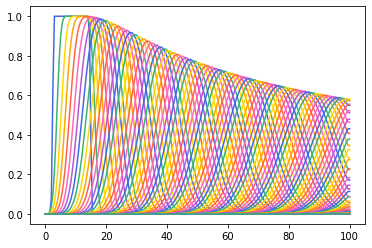

In [7]:
dimt = 1000 # número de iteraciones temporales
deltat = 0.1; deltax = 0.5; 
C = 0.5; alpha = 1.0
u = C*deltax/deltat 
s = alpha*deltat/deltax**2
N = 200 # parámetros naturales de la discretización

T = np.zeros(N+1); T[5:30]=np.ones(25)*1; #T[N]=10 # vector inicial, con las c.i. que queramos
Tnew = T.copy(); Told = T.copy()

for n in range(dimt):
	for i in range(1,N):
		Tnew[i]=(1/(1+2*s))*(Told[i]-C*(T[i+1]-T[i-1])+(2*s)*(T[i-1]-Told[i]+T[i+1]))
	Tnew=(Tnew+T)/2

	T = Tnew.copy(); Told = T.copy()
	
	T[N]=T[N-1]
	
	if n%10==0:
		plt.plot(np.arange(N+1)*deltax, T) #un plot un poco más discretizado para liberar memoria de python